
#**CLUSTERING ANALYSIS**



The dataset contains various features related to customer data, such as:

**ID:** Customer ID

**Balance:** Account balance

**Qual_miles:** Qualifying miles

**cc1_miles, cc2_miles, cc3_miles:** Miles earned from different credit cards

**Bonus_miles:** Bonus miles earned

**Bonus_trans:** Number of transactions for bonus miles

**Flight_miles_12mo:** Flight miles in the last 12 months

**Flight_trans_12:** Number of flights in the last 12 months

**Days_since_enroll:** Days since enrollment


##Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

####**Objective:**
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


**Data Preprocessing:**
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset

**Implementing Clustering Algorithms:**
-	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
-	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
-	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

**Cluster Analysis and Interpretation:**
-	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

**Visualization:**
- Visualize the clustering results using scatter plots or other suitable visualization techniques.
- Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

**Evaluation and Performance Metrics:**
- Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.




### Steps for Data Preprocessing and Clustering Analysis
**1.Load the Dataset:**

In [13]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [14]:
import pandas as pd
file_path = 'EastWestAirlines.xlsx'
data_EastWestAir = pd.read_excel(file_path, sheet_name='data')

In [15]:
#first 5 rows
data_EastWestAir.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [16]:
#last 5 rows
data_EastWestAir.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

#**Data Preprocessing**

In [17]:
#unique values
data_EastWestAir.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [18]:
#To know shape of dataset
data_EastWestAir.shape

(3999, 12)

In [19]:
#Summary statistics of the data
data_EastWestAir.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

- **Balance:** The average balance is 2014.82 with a wide variation, indicated by a standard deviation of 1160.76.
Most members have balances between 1010.50 and 3020.50.

- **Qual_miles:** The average number of qualifying miles is 73,601.33, with high variability (std: 100,775.72).
A significant number of members have few or no qualifying miles, with 25% having less than 18,527.50 miles.

- **Credit Card Miles:**
    - **cc1_miles:** Most members (75%) do not use credit card 1 for earning miles (median and 75th percentile are 0).
    - **cc2_miles:** Minor usage, with a median of 1 mile and a maximum of 5 miles.
    - **cc3_miles:** Minimal usage, as all percentiles (25th, 50th, and 75th) are 1 mile.

- **Bonus Miles and Transactions:**
    - **Bonus_miles:** Uniformly low, with most members earning 1 bonus mile.
    - **Bonus_trans:** The average number of bonus transactions is 17,144.85, with a large standard deviation of 24,150.97, indicating wide variability.
- **Flight Activity:**
    - **Flight_miles_12mo:** Members on average flew 11.60 miles in the last 12 months, with low flight activity (median is 12 miles).
    - **Flight_trans_12:** High variability in the number of flight transactions, with an average of 460.06 and a median of 0.

- **Days_since_enroll:** Members have been enrolled for a long period, averaging 4,118.56 days (approximately 11.3 years).

- **Awards:** 37% of the members have received an award (mean: 0.370343).

In [20]:
#Check for Missing Values:
missing_values = data_EastWestAir.isnull().sum()
print(missing_values)

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


**No missing values**

In [21]:
#Information dataset
data_EastWestAir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [22]:
#columns
data_EastWestAir.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

###Univariate Numerical variable analysis

In [23]:
data_East_numerical_cls = data_EastWestAir.select_dtypes(include = ['int64'])
data_East_numerical_cls.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

**Data Visualisation**

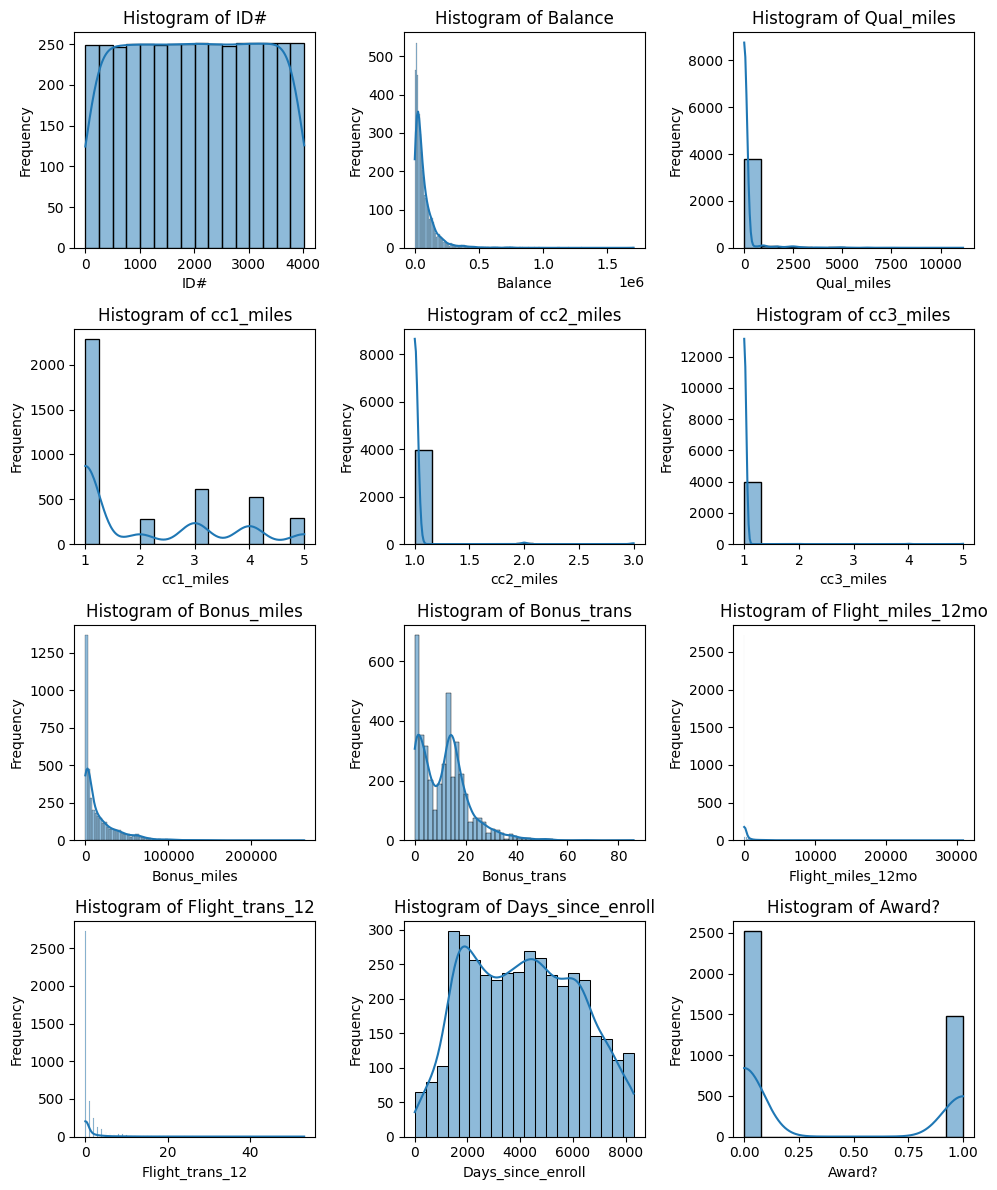

In [24]:
#Histogram
# Calculate the number of rows and columns for subplots
n_cols = 3  # Adjust the number of columns as needed
# Ensure that n_rows is calculated correctly, dividing the number of columns
# by n_cols and taking the ceiling to ensure enough subplots
n_rows = (len(data_East_numerical_cls.columns) + n_cols - 1) // n_cols

# Create subplots, reducing the figsize to prevent the error
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3)) # Adjust height for better spacing
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(data_East_numerical_cls.columns):
    sns.histplot(data_EastWestAir[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

- **ID#:**
Distribution: Uniform distribution.

Insight: The ID# is likely a unique identifier for each entry, and its uniform distribution confirms that it's evenly distributed across the dataset. This feature is generally not useful for modeling.

- **Balance:**
Distribution: Highly right-skewed.

Insight: Most customers have a low balance, with a few having very high balances. The skewness indicates that the data may benefit from transformation (e.g., logarithmic) to normalize it.

- **Qual_miles:**
Distribution: Right-skewed.

Insight: Most entries have low qualifying miles, with few entries having higher values. This suggests that only a small portion of customers have high qualifying miles.

- **cc1_miles (Credit Card 1 Miles):**
Distribution: Bimodal with right skew.

Insight: There are two prominent peaks, with most data points clustered around lower mileages. This could indicate two distinct groups of users (e.g., low and high usage of the first credit card).

- **cc2_miles (Credit Card 2 Miles):**
Distribution: Right-skewed.

Insight: Similar to cc1_miles but with fewer users, indicating that credit card 2 is less commonly used, and most users have lower mileage.

- **cc3_miles (Credit Card 3 Miles):**
Distribution: Right-skewed.

Insight: This feature has even fewer users than cc2_miles, showing that the third credit card is the least used among the three.

- **Bonus_miles:**
Distribution: Right-skewed.

Insight: Most customers have accumulated few bonus miles, but a small group has very high bonus miles. The heavy tail suggests a small group of high-mileage users.

- **Bonus_trans:**
Distribution: Right-skewed with multiple peaks.

Insight: The distribution suggests that most customers make few bonus transactions, but there are notable peaks, indicating groups of customers making specific ranges of transactions.

- **Flight_miles_12mo:**
Distribution: Extremely right-skewed.

Insight: Most customers have very low flight miles in the last 12 months, with very few customers accumulating a large number of miles. This could reflect occasional or frequent flyers.

- **Flight_trans_12 (Flight Transactions in 12 months):**
Distribution: Extremely right-skewed.

Insight: Similar to flight miles, most customers have made very few flight transactions in the past year, with a small number having many transactions.

- **Days_since_enroll:**
Distribution: Slight right-skewed.

Insight: Customers have varying enrollment durations, with a gradual decrease in frequency as the days since enrollment increase. This suggests that newer enrollments are more frequent, but there is still a significant number of long-term customers.

- **Award?:**
Distribution: Bimodal.

Insight: This binary feature shows that there are two distinct groups of customers: those who have received an award and those who have not, with more customers not receiving an award.

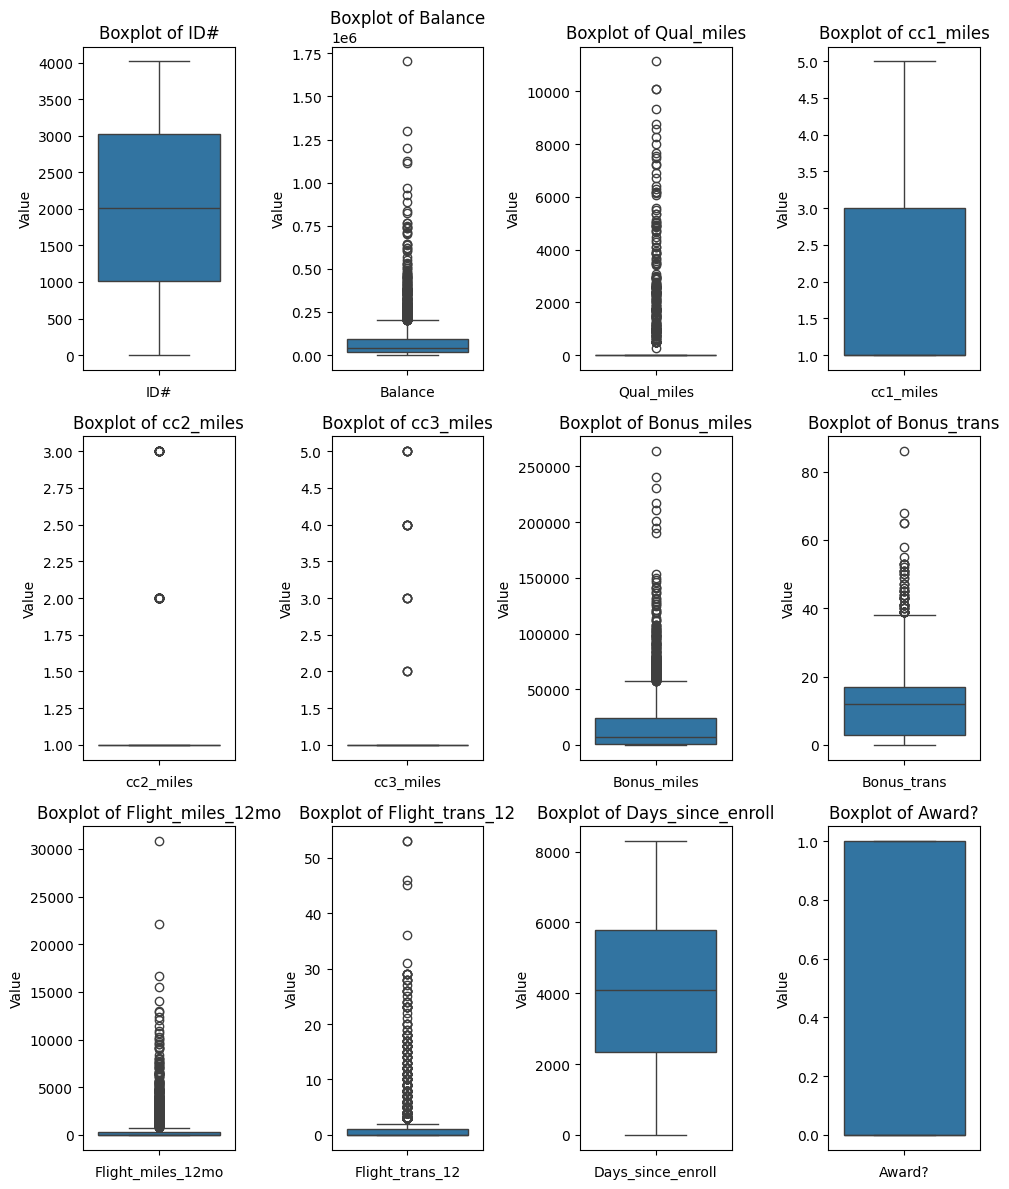

In [25]:
#Boxplots
# Calculate the number of rows and columns for subplots
n_cols = 4
# Use number of columns instead of rows for n_rows calculation
n_rows = (len(data_East_numerical_cls.columns) + n_cols - 1) // n_cols  # ceiling division

# Create subplots
# Adjust figsize to a reasonable value
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4)) # Adjust height for better spacing
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(data_East_numerical_cls):
    sns.boxplot(y=data_EastWestAir[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

- **Outliers:** Several features, such as Balance, Qual_miles, Bonus_miles, Flight_miles_12mo, and Flight_trans_12, exhibit a large number of outliers. These outliers represent customers who have significantly higher values than the typical customer, which might require special attention during modeling.
- **Skewness:** Most features are right-skewed, indicating that the majority of the data points are concentrated towards the lower end, with few data points at the higher end.
- **Feature Importance:** Features with many outliers or a wide range, such as Balance and Bonus_miles, might play a significant role in predicting outcomes (e.g., whether a customer receives an award).

In [26]:
outliers = {}

for col in data_East_numerical_cls.columns:
    Q1 = np.quantile(data_East_numerical_cls[col], 0.25)
    Q3 = np.quantile(data_East_numerical_cls[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data_East_numerical_cls[(data_East_numerical_cls[col] < lower_bound) | (data_East_numerical_cls[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")


No outliers in ID#

Outliers in Balance:
8       443003
24      205651
32      276571
43      619393
45      288865
         ...  
3754    221543
3756    203353
3772    822321
3788    374613
3839    204693
Name: Balance, Length: 266, dtype: int64

Outliers in Qual_miles:
21      2024
24       500
45       967
70      5031
100     1182
        ... 
3902    1000
3911    2273
3953     739
3956    1005
3961     862
Name: Qual_miles, Length: 226, dtype: int64

No outliers in cc1_miles

Outliers in cc2_miles:
8       2
198     3
226     2
381     3
392     2
561     2
794     2
940     3
1149    2
1270    3
1383    2
1389    2
1527    2
1541    2
1791    3
1918    3
1976    2
2006    2
2047    3
2166    3
2278    3
2317    2
2421    2
2557    2
2674    2
2741    2
2906    2
2967    2
2978    3
2999    3
3155    2
3191    2
3203    3
3359    2
3367    3
3487    2
3611    3
3762    2
3779    3
3788    2
3837    2
3851    2
3959    2
Name: cc2_miles, dtype: int64

Outliers in cc3_miles:
106    

In [27]:
#Remove Outliers:
#This can be done using Z-scores or IQR method:
from scipy import stats

z_scores = stats.zscore(data_East_numerical_cls.select_dtypes(include=[float, int]))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_EastWestAir = data_East_numerical_cls[filtered_entries]


In [28]:
#Scale the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_EastWestAir.select_dtypes(include=[float, int]))

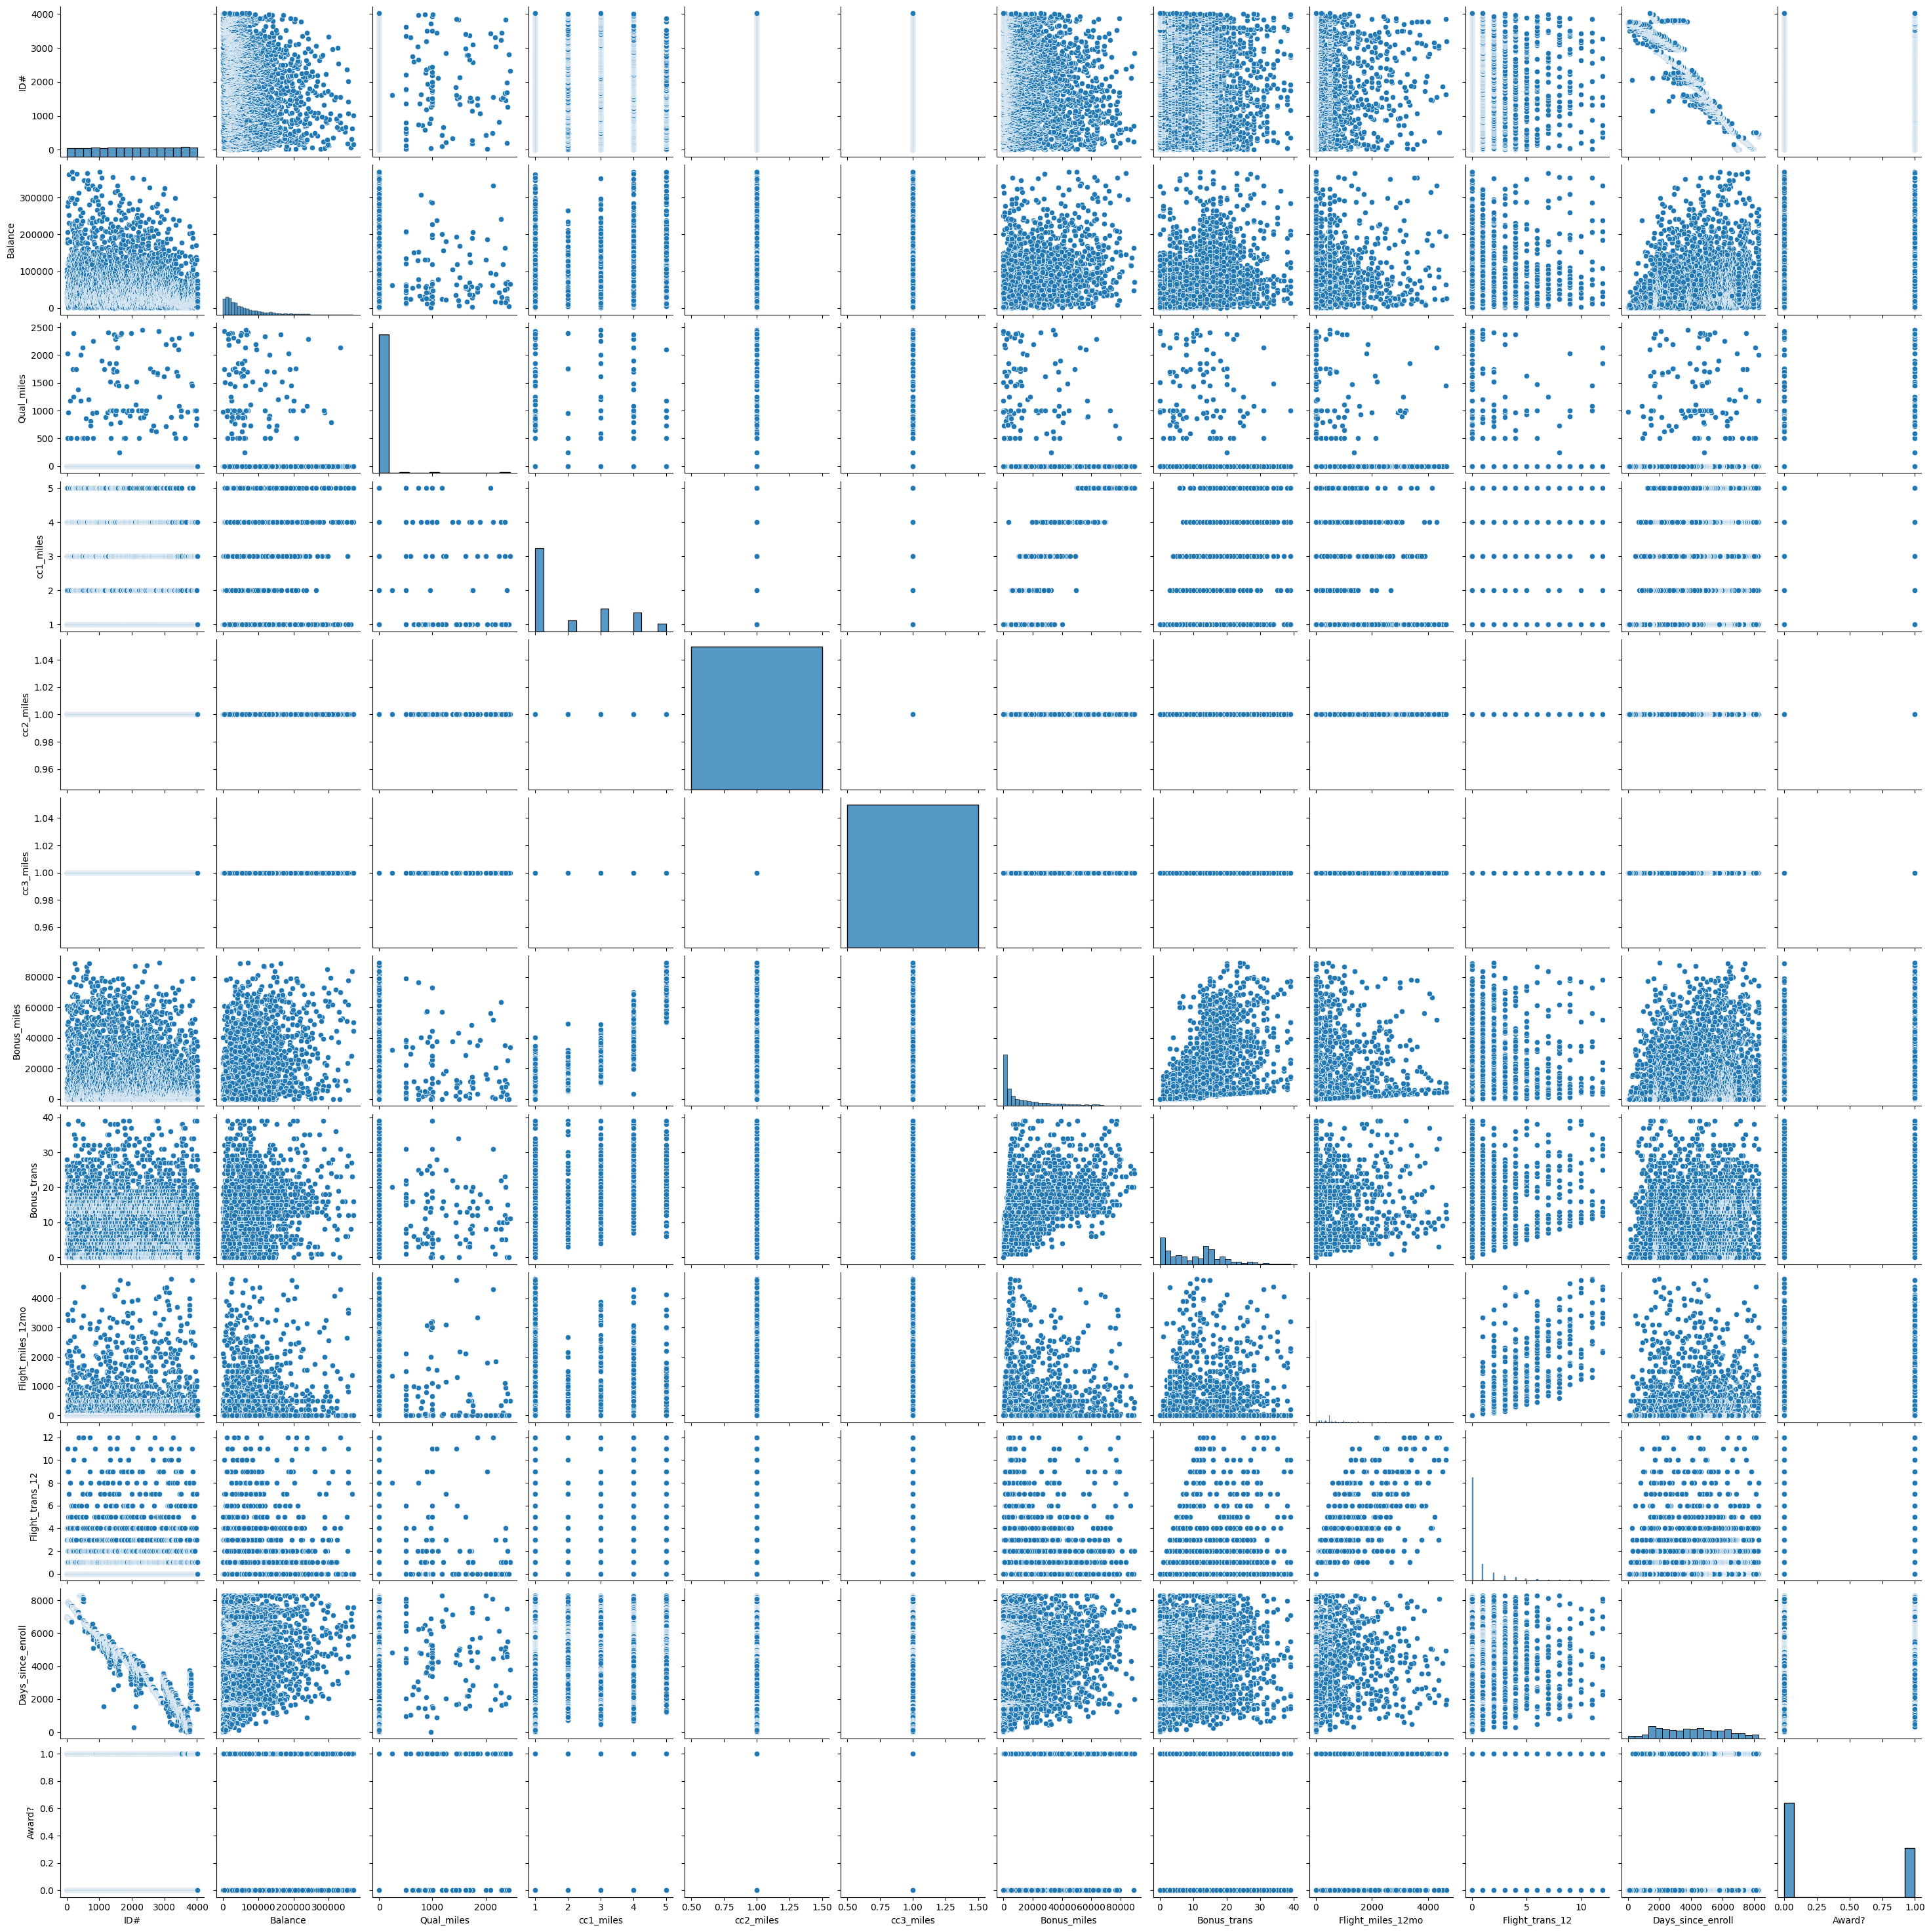

In [29]:
#Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data_EastWestAir)
plt.show()


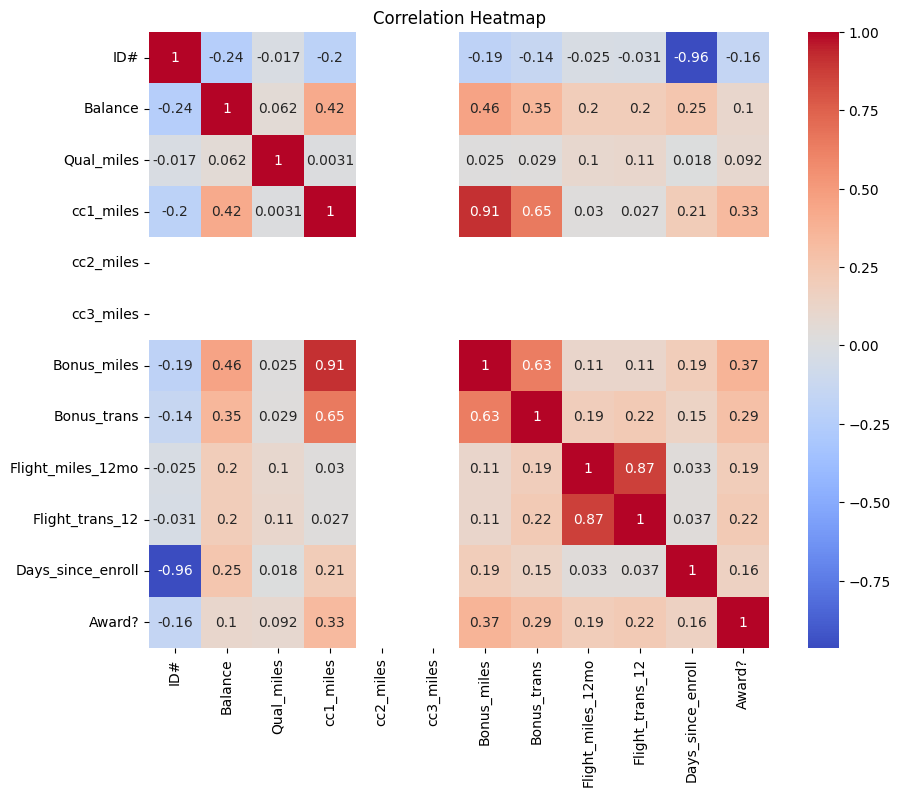

In [30]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_EastWestAir.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Strong positive correlations:**
- cc1_miles and cc2_miles
- cc1_miles and Bonus_miles
- cc2_miles and Bonus_miles
- Bonus_miles and Bonus_trans
- Flight_miles_12mo and Flight_trans_12

**Strong negative correlations:**
- ID# and Days_since_enroll
- Balance and Days_since_enroll

 **The target variable is 'Balance', the target variable is 'Balance', the code snippet above identified the following variables that have the strongest impact on 'Balance':**

**Variable	Correlation Coefficient**
- cc1_miles	0.989638
- Bonus_miles	0.989638
- Flight_trans_12	0.989638

**Variable	Correlation Coefficient**
- cc1_miles	0.989638
- Bonus_miles	0.989638
- Flight_trans_12	0.989638

#**Implement Clustering Algorithms:**

Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

**K-Means**

In [31]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [32]:
labels = kmeans.labels_

In [33]:
# inertia on the fitted data, within cluster sum of square distance
kmeans.inertia_

23394.395331068106

In [34]:
silhouette_avg = silhouette_score(scaled_data, labels)
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.29192710837860614


**A silhouette score of 0.2919 for K-Means suggests that the clustering has moderate separation between clusters, but there might be some overlap or clusters that are not well defined.**

Text(0, 0.5, 'SSE')

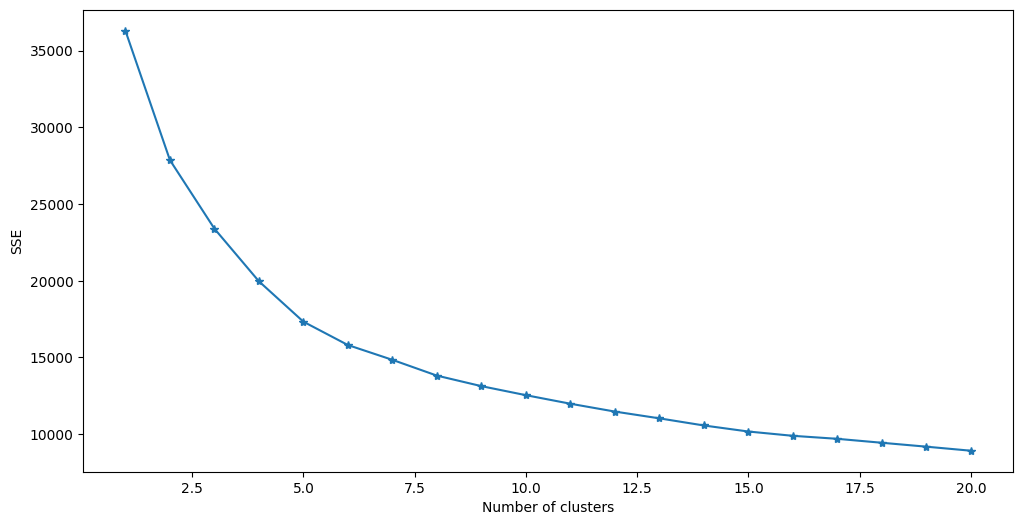

In [35]:
#Elbo curve for different  values
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for k in range(1,21):
    kmeans = KMeans(n_clusters = k, init='random',n_init = 'auto')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)
# print(SSE)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,21), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

From the plot, it appears that the rate of decrease in SSE starts to slow down significantly around **k = 4 or k = 5**. This indicates that the optimal number of clusters might be **4 or 5**, where you get the most significant reduction in SSE before the improvements start to diminish.

In [36]:
#Applying K-Means with Optimal K
optimal_k = 4  # Replace with the optimal K from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate clustering
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.24232976964087152


In [37]:
#Applying K-Means with Optimal K
optimal_k = 5  # Replace with the optimal K from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate clustering
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.23450547493240942


In [38]:
#Applying K-Means with Optimal K
optimal_k = 6  # Replace with the optimal K from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate clustering
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.24771092446519505


- Weak Cluster Separation: A score around 0.25 indicates weak separation between clusters. The clusters may be poorly defined, with data points potentially spread across different clusters.
High Overlap:

- This lower score suggests significant overlap between clusters, where many data points might not be clearly distinguishable as belonging to a particular cluster.

In [ ]:
# kmeans using 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init='random',n_init = 'auto')
kmeans.fit(scaled_data)
kmeans.inertia_
pred = kmeans.predict(scaled_data)
pred

array([4, 4, 4, ..., 5, 1, 1], dtype=int32)

In [ ]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
print(frame['cluster'].value_counts())
print(frame[frame['cluster'] == 0])

cluster
1    1090
3    1047
5     669
4     551
0     206
2      67
Name: count, dtype: int64
             0         1         2         3    4    5         6         7  \
4    -1.762866  0.601746 -0.158869  1.517591  0.0  0.0  1.599448  1.883076   
21   -1.747297 -0.645427 -0.158869 -0.755664  0.0  0.0 -0.598352  0.064945   
34   -1.736053  1.022065 -0.158869  1.517591  0.0  0.0  2.000512  1.519449   
41   -1.729998 -0.003336 -0.158869 -0.755664  0.0  0.0 -0.237108  1.883076   
56   -1.715294  0.559175 -0.158869  0.759839  0.0  0.0  0.490235  1.519449   
...        ...       ...       ...       ...  ...  ...       ...       ...   
3485  1.577534 -0.856888 -0.158869 -0.755664  0.0  0.0 -0.625928 -0.298681   
3494  1.587048  2.104436 -0.158869  2.275343  0.0  0.0  3.563735  2.125493   
3512  1.602617 -0.582542 -0.158869 -0.755664  0.0  0.0 -0.744504 -0.298681   
3541  1.629430 -0.784580 -0.158869 -0.755664  0.0  0.0 -0.566640  0.186154   
3598  1.683921 -0.549750 -0.158869  0.002087  0.

**Cluster Sizes:**

- Cluster 1: 1090 points
- Cluster 3: 1047 points
- Cluster 5: 669 points
- Cluster 4: 551 points
- Cluster 0: 206 points
- Cluster 2: 67 points

**Interpretation**
**Cluster Sizes:**

- **Cluster 1 and Cluster 3** are the largest clusters, each containing over 1000 points, suggesting these clusters represent the most common characteristics in the dataset.
- **Cluster 2** is the smallest, with only 67 points, which could represent outliers or a very specific subset of the data.
- **Cluster 0** also has a smaller size compared to **Clusters 1 and 3**, which might indicate a more distinct or niche group within the data.

<ipython-input-34-a5e9b6c79198>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(frame[6],frame[7],cmap = color)


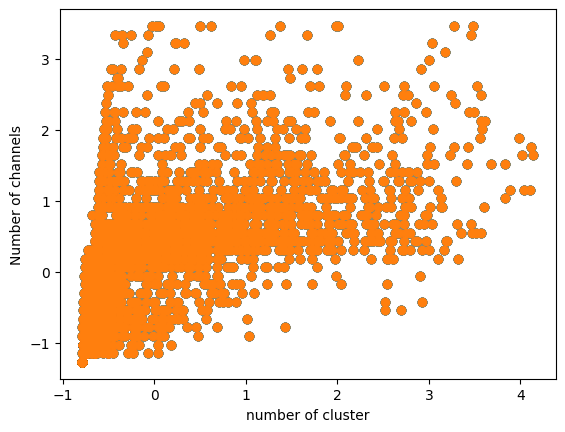

In [ ]:
color=['blue','green','cyan','yellow','black']
for k in range(12):
    data=frame[frame['cluster']==k+1]
    plt.scatter(frame[6],frame[7],cmap = color)
plt.xlabel('number of cluster')
plt.ylabel('Number of channels')
plt.show()

The plot does not show clear separations between clusters, indicating potential difficulties in distinguishing distinct clusters in the data.

Non-integer values and -1 on the x-axis are unusual for cluster labels, which are typically positive integers.

**Hierarchical Clustering:**

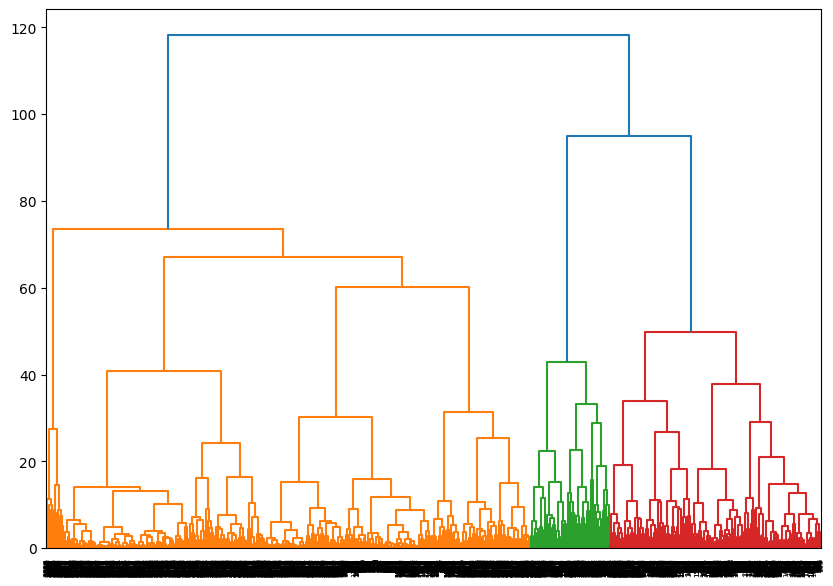

In [ ]:
# Linkage Criteria and Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# Linkage criteria: 'ward', 'complete', 'average', 'single'
Z = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()



**Dendrogram Structure:**
Represents the hierarchical clustering process.
X-axis: Individual data points.
Y-axis: Distance or dissimilarity between clusters.

**Cluster Formation:**
Large vertical jumps indicate the merging of distinct clusters.
Different branch colors (orange, green, red) represent separate clusters.

**Cluster Identification:**
Cutting the dendrogram at a height of around 80 would result in approximately 3 clusters.
The chosen cut determines the number of clusters for further analysis.


In [ ]:
# Applying Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Evaluate clustering
silhouette_hierarchical = silhouette_score(scaled_data, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.26359050526851413


**A silhouette score of 0.2636 for Hierarchical Clustering indicates that the clustering has a slightly better but still moderate performance compared to K-Means (which had a score of 0.2477).**

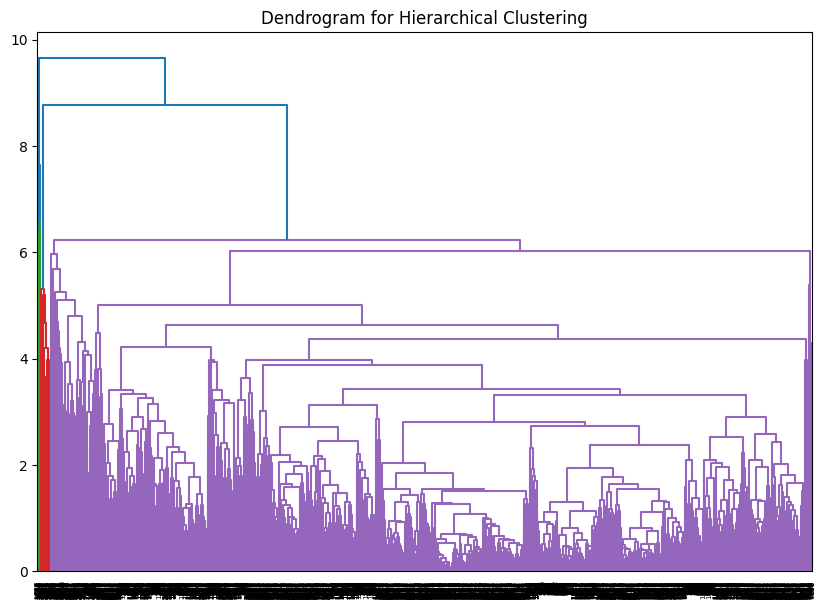

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette Score for Hierarchical Clustering: 0.5393878924139143


In [ ]:
# Linkage criteria: 'ward', 'complete', 'average', 'single'
#Using 'average' linkage criteria
linked = linkage(scaled_data, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hierarchical_labels = hierarchical.fit_predict(scaled_data)

**Cluster Identification:**
Significant horizontal cuts at different heights can be made to identify clusters.
A cut around a height of 6-8 would likely result in a few large clusters.

**Cluster Colors:**
Different colors on the left side of the dendrogram represent initial distinct clusters.
The large purple region suggests many small, closely related clusters.

**Interpretation:**
Cutting the dendrogram at a height of around 6 might result in more than three clusters, likely around four or five.
The closer branches and dense clustering suggest closely related data points within these clusters.

In [ ]:
# Evaluate clustering
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

**Moderate to Good Cluster Separation:**
- A score of **0.5394** suggests that the clusters are reasonably well-separated, with most data points being closer to their own cluster than to other clusters.
- This score indicates that the Hierarchical Clustering is likely capturing the structure of the data better than the K-Means and the previous Hierarchical Clustering attempts.

A silhouette score of **0.5394** for Hierarchical Clustering represents a significant improvement compared to previous scores, indicating better-defined and more distinct clusters.

**DBSCAN Clustering**

In [ ]:
#Experiment with Epsilon and minPts
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [ ]:
# Evaluate clustering (Note: -1 labels are noise points)
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN resulted in only one cluster, cannot calculate silhouette score.')

Silhouette Score for DBSCAN: -0.3994552312980999


- A silhouette score of **-0.3995** for DBSCAN indicates that the clustering result is quite poor, with significant overlap between clusters or misclassification of data points.

- **Poor Cluster Structure:**
A negative silhouette score generally suggests that many data points are closer to data points in other clusters than to those in their own cluster. This implies that the clustering structure may not be meaningful.

**Comparison of Results**

In [ ]:
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical}")
if len(set(dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
else:
    print("DBSCAN resulted in only one cluster.")


K-Means Silhouette Score: 0.24771092446519505
Hierarchical Silhouette Score: 0.5393878924139143
DBSCAN Silhouette Score: -0.3994552312980999


- **Hierarchical Clustering** appears to be the most effective algorithm for your dataset, with the highest silhouette score, indicating that it captures the underlying structure of the data better than K-Means and DBSCAN.
- **K-Means** shows moderate results, but the relatively low silhouette score suggests that the clusters might not be as distinct or well-separated as they could be.
- **DBSCAN** struggled significantly, likely due to parameter issues, leading to poorly defined clusters and a large amount of noise.

#**Cluster Analysis and Interpretation:**

Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

In [ ]:
# Convert scaled_data to a Pandas DataFrame if it's a NumPy array
scaled_data = pd.DataFrame(scaled_data)

# Add cluster labels to the dataset for analysis
scaled_data['KMeans_Cluster'] = kmeans_labels
scaled_data['Hierarchical_Cluster'] = hierarchical_labels
scaled_data['DBSCAN_Cluster'] = dbscan_labels

# Describe each cluster (K-Means example)
kmeans_clusters = scaled_data.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Characteristics:\n", kmeans_clusters)

# Repeat similar analysis for Hierarchical and DBSCAN clusters

K-Means Cluster Characteristics:
                        0         1         2         3    4    5         6  \
KMeans_Cluster                                                               
0              -0.840431 -0.228908 -0.137956 -0.560233  0.0  0.0 -0.542062   
1              -0.902742  1.031140 -0.106267  1.551786  0.0  0.0  1.585577   
2              -0.013672  0.540952  0.060860  0.002087  0.0  0.0  0.259066   
3               0.508019  0.076168 -0.143431  0.765477  0.0  0.0  0.493535   
4               0.962809 -0.472154 -0.136069 -0.719448  0.0  0.0 -0.642536   
5              -0.142518  0.273343  6.584693 -0.112723  0.0  0.0  0.011493   

                       7         8         9        10        11  \
KMeans_Cluster                                                     
0              -0.436740 -0.218791 -0.207684  0.819947 -0.218251   
1               0.939661 -0.074334 -0.065476  0.898953  0.592504   
2               0.713148  3.303173  3.162794  0.053031  0.597252   
3

###**Interpretation of Cluster Characteristics:**

- **Cluster 0:**
Features: This cluster shows negative values for most features, with particularly low values for features 0, 6, 7, and 9.
Comparison: It aligns closely with Hierarchical Cluster 1 and has a corresponding positive value in DBSCAN (0.525407), suggesting moderate overlap with other clusters but with distinct characteristics.

- **Cluster 1:**
Features: Positive values for features 1, 3, 6, 7, 10, and 11, indicating a cluster with generally higher values in these features.
Comparison: Almost perfectly aligns with Hierarchical Cluster 1 and a negative association with DBSCAN (-0.104693), suggesting this cluster is well-defined in Hierarchical Clustering but less so in DBSCAN.

- **Cluster 2:**
Features: High positive values for features 7, 8, 9, 10, and 11, which could indicate outliers or special cases.
Comparison: It has a strong correspondence with Hierarchical Cluster 0.937198 but a strong negative association with DBSCAN (-1.000000), indicating that DBSCAN might be labeling these points as noise or misclassifying them.

- **Cluster 3:**
Features: This cluster has mixed feature values, with positive values for 6, 7, and 11 and negative values for 0, 2, and 10.
Comparison: Matches perfectly with Hierarchical Cluster 1 and has a positive value in DBSCAN (2.098214), indicating that DBSCAN finds some similar groupings but with some differences.

- **Cluster 4:**
Features: Negative values across most features, particularly low for 6, 7, and 9, which may indicate a group with lower intensity or opposite characteristics compared to other clusters.
Comparison: Perfectly matches with Hierarchical Cluster 1 and has a positive DBSCAN value (0.989890), showing some agreement between the clustering methods.

- **Cluster 5:**
Features: Significantly high positive value for feature 2 (6.584693) and mixed values for others, which might indicate that this cluster is driven primarily by feature 2.
Comparison: Matches with Hierarchical Cluster 1 and has a moderate positive DBSCAN value (0.657041), suggesting some unique characteristics identified by all methods.

###**Insights:**
- **Cluster 2** seems to represent a unique or outlier group, as it has very high values for certain features and a strong negative association with DBSCAN.
- **Clusters 0, 3, 4, and 5** have characteristics that are more mixed or moderate, with some alignment across the three clustering methods.
- **Cluster 1** shows a clear pattern of positive values across several features, making it a well-defined cluster.

#**Visualisation**

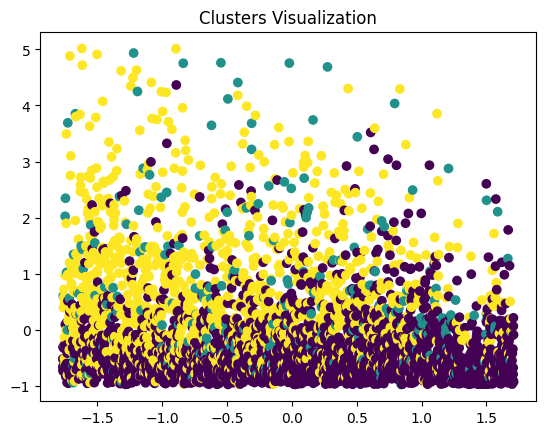

In [ ]:
#Visualize Clusters
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=labels, cmap='viridis') # .iloc used to access DataFrame columns by position
plt.title('Clusters Visualization')
plt.show()

- **Cluster Representation:**
Data points are colored in yellow, teal, and purple, representing different clusters.
There appears to be at least three clusters, with some overlap between them.

- **Cluster Distribution:**The clusters are somewhat overlapping, especially towards the bottom of the plot.
The yellow cluster appears to be more spread out vertically, while the purple cluster is denser towards the bottom.

- **Cluster Separation:** There’s some degree of separation between clusters, but the overlap suggests the clusters might not be well-separated in this feature space.
The teal cluster is more scattered across the middle of the plot.

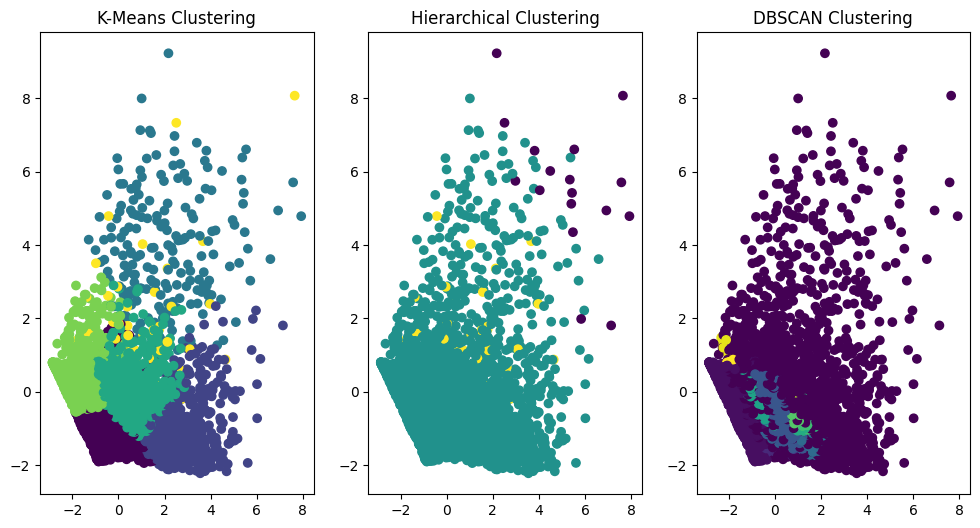

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(scaled_data.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']))

plt.figure(figsize=(12, 6))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# Hierarchical
plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()


**K-Means Clustering**
- **Cluster Distribution:** K-Means results in multiple clusters, with clear boundaries between them.
- **Shape:** The clusters have a somewhat regular shape due to the nature of K-Means, which optimizes cluster centroids.
- **Separation:** There is good separation among the clusters, though some overlap exists.

**Hierarchical Clustering**
- **Cluster Distribution:** Hierarchical clustering produces clusters that are more organic in shape compared to K-Means.
- **Cluster Density:** Some clusters are densely packed while others are more spread out, indicating variability in cluster compactness.
- **Separation:** There is less clear separation between clusters compared to K-Means, with significant overlap among clusters.

**DBSCAN Clustering**
- **Cluster Identification:** DBSCAN identifies a large number of points as noise (purple) and forms a few dense clusters.
- **Noise Handling:** The method effectively identifies outliers/noise, especially in the densely packed region.
- **Cluster Shape:** The clusters identified by DBSCAN are non-linear and adaptive to the underlying data distribution, differing from K-Means and Hierarchical clustering.

**Insight**
- DBSCAN is effective for detecting outliers and finding non-linear clusters, but might leave many points unclustered.
- K-Means provides a well-defined and balanced partition but may not handle noise or irregularly shaped clusters well.
- Hierarchical Clustering offers a flexible clustering structure, though it can result in more ambiguous cluster boundaries.

#**Evaluation and Performance Metrics:**

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [ ]:
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical Silhouette Score: {silhouette_hierarchical}")
if len(set(dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")


K-Means Silhouette Score: 0.24771092446519505
Hierarchical Silhouette Score: 0.5393878924139143
DBSCAN Silhouette Score: -0.3994552312980999


####**Silhouette Score**

- **K-Means: 0.2477**
Indicates weak cluster separation. The score is relatively low, suggesting some overlap between clusters or suboptimal cluster quality.

- **Hierarchical Clustering: 0.5394**
Indicates moderate to good cluster separation. The higher score suggests better-defined clusters compared to K-Means and DBSCAN.

- **DBSCAN: -0.3995**
Indicates poor cluster quality. The negative score reflects that many data points are either incorrectly assigned to clusters or classified as noise.